<a href="https://colab.research.google.com/github/Jinw2/Yanjin-Wang/blob/STA365-homework/hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Question 1
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab/master.csv")
print(df.head())

Mounted at /content/drive
   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generat

In [3]:
## part 1 question1
import pymc as pm; import numpy as np
X = df['year'].values.reshape(-1, 1)
y = df['suicides/100k pop'].values.reshape(-1, 1)

n, p = X.shape[0], 1
with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=np.zeros((p,1)), cov=np.eye(p), shape=(p,1))
    sigma = pm.TruncatedNormal('sigma', mu=1, sigma=1, lower=0)
    y = pm.Normal('y', mu=pm.math.dot(X, betas), sigma=sigma, observed=y)

with MLR:
    idata = pm.sample()

In [4]:
import pandas as pd
df['suicides/100k pop'] = df['suicides/100k pop'].apply(lambda x: 1 if x > 100 else 0)
df_new = df.dropna(subset=['suicides/100k pop'])

In [5]:
## part 1 question2
from pymc.math import invlogit as tt_invlogit
import pymc as pm; import numpy as np
X = df_new['year'].values.reshape(-1, 1)
y = df_new['suicides/100k pop'].values.reshape(-1, 1)

n, p = X.shape[0], 1
with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=np.zeros((p,1)), cov=np.eye(p), shape=(p,1))
    sigma = pm.TruncatedNormal('sigma', mu=1, sigma=1, lower=0)
    pred = pm.math.dot(X, betas)
    p = pm.math.invlogit(pred)
    y = pm.Bernoulli('y', p = p, observed=y)

with MLR:
    idata = pm.sample()

Question 3: I choose normal distribution because the betas I use normal distribution and sigma is truncated normal distribution.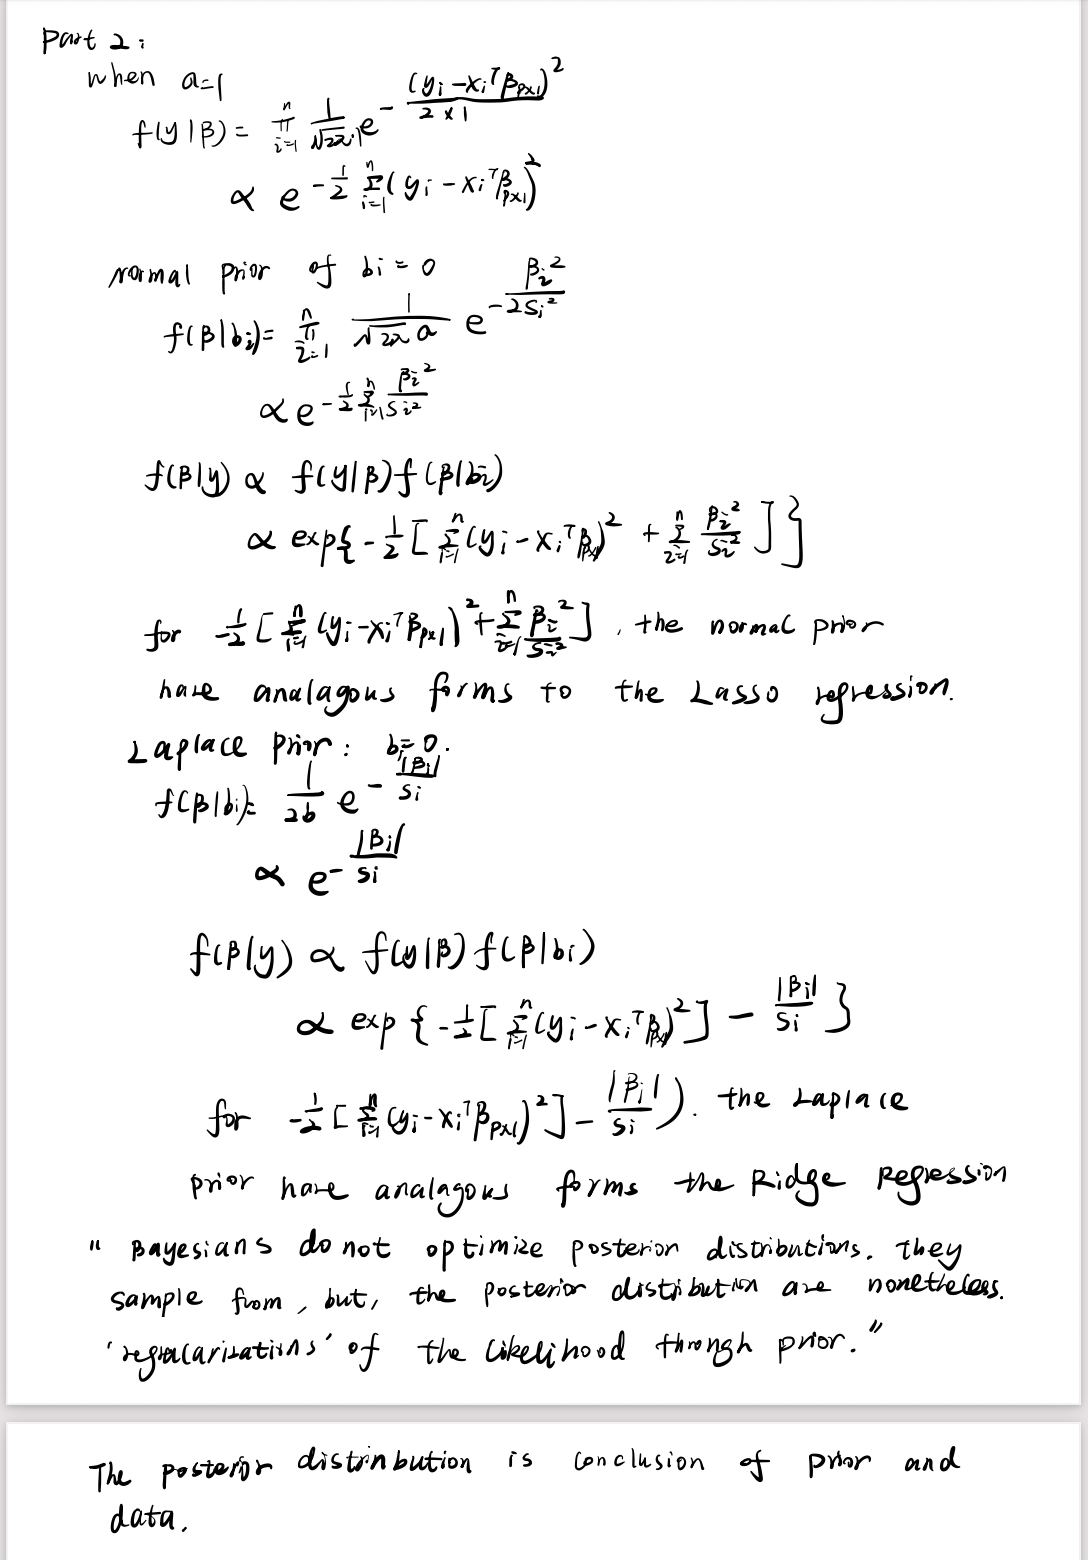